## **COVID-19-CNN-Image-Detection-from-Lung-X-Rays**

This project aims to take an chest X-Ray image and detect if the patient has the COVID-19 infection. It uses a CNN to train on a large dataset of both normal and COVID lung images to learn how to process the difference in both images.

**Installing Tensorflow** 

Tensorflow is a opensource software library for machine learning and Artificial Intelligence, which  will help to implement best practices for data automation, model tracking, performance monitoring and model retraining.

In [1]:
#installing tensorflw
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 497.6 MB 1.5 kB/s 
     |████████████████████████████████| 5.8 MB 44.8 MB/s 
     |████████████████████████████████| 1.4 MB 51.5 MB/s 
     |████████████████████████████████| 462 kB 70.2 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


**Dataset** 

Unzip the dataset from the drive for analysis


In [10]:
!unzip /content/drive/MyDrive/project_covid_final.zip

Archive:  /content/drive/MyDrive/project_covid_final.zip
   creating: project_covid_final/Test/
   creating: project_covid_final/Test/Covid/
  inflating: project_covid_final/Test/Covid/16654_1_1.png  
  inflating: project_covid_final/Test/Covid/16654_2_1.jpg  
  inflating: project_covid_final/Test/Covid/16654_4_1.jpg  
  inflating: project_covid_final/Test/Covid/23E99E2E-447C-46E5-8EB2-D35D12473C39.png  
  inflating: project_covid_final/Test/Covid/31BA3780-2323-493F-8AED-62081B9C383B.jpeg  
  inflating: project_covid_final/Test/Covid/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg  
  inflating: project_covid_final/Test/Covid/41591_2020_819_Fig1_HTML.webp-day10.png  
  inflating: project_covid_final/Test/Covid/41591_2020_819_Fig1_HTML.webp-day5.png  
  inflating: project_covid_final/Test/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: project_covid_final/Test/Covid/4-x-day1.jpg  
  inflating: project_covid_final/Test/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflatin

Dataset in Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Training and Test Data**

In [4]:
TRAIN_PATH = "project_covid_final/Train"
TEST_PATH = "project_covid_final/Test"

**Importing Packages**

**Numpy**

NumPy is a Python library used for working with arrays.

**Matplotlib**

Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.

**Keras**

Keras is a high-level, deep learning API developed by Google for implementing neural networks.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

# **Building CNN Architecture**

In [6]:
# CNN Based Model in Keras
# Deep learning model to process the data

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [7]:
#Summary of deep learning model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

# **Training the model**

In [8]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    'project_covid_final/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [12]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [13]:
validation_generator = test_dataset.flow_from_directory(
    'project_covid_final/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [14]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

<ipython-input-14-e59c1f494e68>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 77s 11s/step - loss: 0.8340 - accuracy: 0.5179 - val_loss: 0.6829 - val_accuracy: 0.5333
Epoch 2/10
7/7 [==============================] - 70s 10s/step - loss: 0.6162 - accuracy: 0.6607 - val_loss: 0.5601 - val_accuracy: 0.5833
Epoch 3/10
7/7 [==============================] - 73s 10s/step - loss: 0.4803 - accuracy: 0.7679 - val_loss: 0.3875 - val_accuracy: 0.9167
Epoch 4/10
7/7 [==============================] - 69s 10s/step - loss: 0.3595 - accuracy: 0.8348 - val_loss: 0.2359 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 72s 10s/step - loss: 0.2491 - accuracy: 0.9018 - val_loss: 0.1212 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 73s 10s/step - loss: 0.1727 - accuracy: 0.9554 - val_loss: 0.0986 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 69s 10s/step - loss: 0.1481 - accuracy: 0.9598 - val_loss: 0.1080 - val_accuracy: 0.9833
Epoch 8/10
7/7 [===========

In [15]:
model.save("model_adv.h5")

In [16]:
model.evaluate_generator(train_generator)

<ipython-input-16-e4ade065aa26>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.10640668123960495, 0.9732142686843872]

In [17]:
model.evaluate_generator(validation_generator)

<ipython-input-17-8951cfd684a1>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.07407459616661072, 0.9833333492279053]

# **Model Evaluation**

In [18]:
model = load_model('model_adv.h5')

In [19]:
import os

In [20]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [21]:
y_actual = []
y_test = []

In [22]:
from PIL import Image
for i in os.listdir("./project_covid_final/Test/Normal/"):
  img = image.load_img("./project_covid_final/Test/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  
  predict=model.predict(img) 
  classes_x=np.argmax(predict,axis=1)
  y_test.append(predict[0,0])
  y_actual.append(1)

In [23]:
for i in os.listdir("./project_covid_final/Test/Covid/"):
  img = image.load_img("./project_covid_final/Test/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  predict=model.predict(img) 
  classes_x=np.argmax(predict,axis=1)
  y_test.append(predict[0,0])
  y_actual.append(0)

In [24]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [25]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
y_test

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
#confusion matrix cannot handle different datatypes so rounding y_test
y_test.round

<function ndarray.round>

# **Confusion Matrix**

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_actual, y_test.round())

In [30]:
cm

array([[30,  0],
       [ 2, 28]])

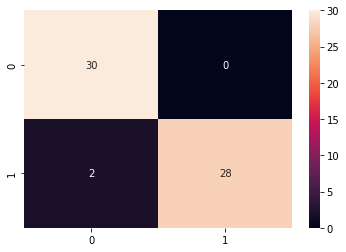

In [31]:
import seaborn as sns
sns.heatmap(cm, cmap=None, annot=True)

# **Training and Validation Loss**

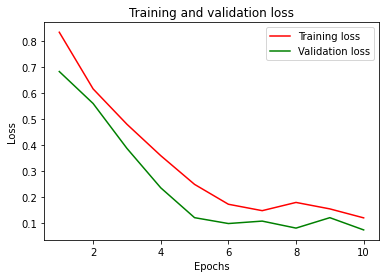

In [32]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Training and Validation Accuracy**

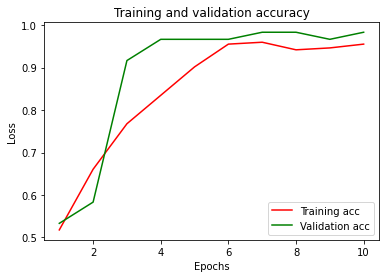

In [33]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Results of Radiologist vs CNN Model**

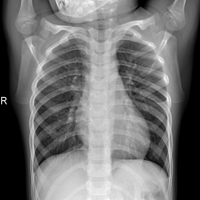

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


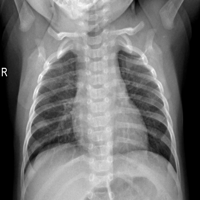

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


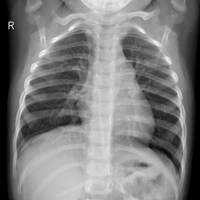

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


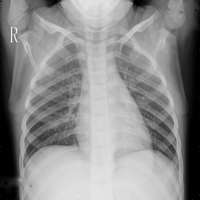

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


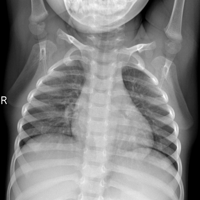

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


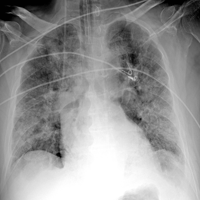

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


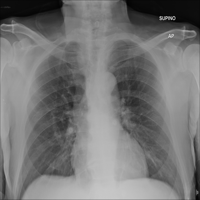

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


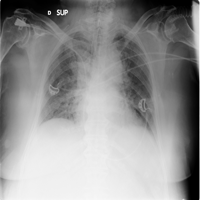

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


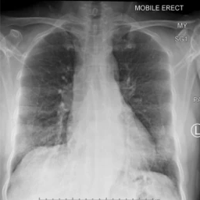

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


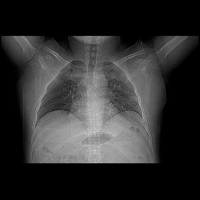

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


In [34]:
class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   
from PIL import Image
j = 0
for i in os.listdir("./project_covid_final/Test/Normal/"):
  j = j+1
  pil_img = Image.open('./project_covid_final/Test/Normal/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./project_covid_final/Test/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  predict=model.predict(img) 
  classes_x=np.argmax(predict,axis=1)
  
  print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)

  if predict==0:
    print(color.RED + 'CNN Model: COVID-19 +ve' + color.RED)
  else:
    print("CNN Model: COVID-19 -ve")
  if (j==5):
    break

from PIL import Image
j = 0
for i in os.listdir("./project_covid_final/Test/Covid/"):
  j = j+1
  pil_img = Image.open('./project_covid_final/Test/Covid/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./project_covid_final/Test/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  predict=model.predict(img) 
  classes_x=np.argmax(predict,axis=1)
  print(color.RED + 'Radiologist: COVID-19 +ve' + color.RED)
  if predict==0:
    print("CNN Model: COVID-19 +ve")
  else:
    print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)
  if (j==5):
    break